In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(6)

N = 100

cluster1 = np.random.multivariate_normal([2, -2], cov=[[2, 1], [1, 3]], size=N)
cluster2 = np.random.multivariate_normal([2, 2], cov=[[4, -.5], [-.5, 2]], size=N)
cluster3 = np.random.multivariate_normal([0, -5], cov=[[1, 0.5], [0.5, 2]], size=N) 

X = np.vstack((cluster1, cluster2, cluster3))
y = np.array([0] * N + [1] * N + [2] * N)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=5)

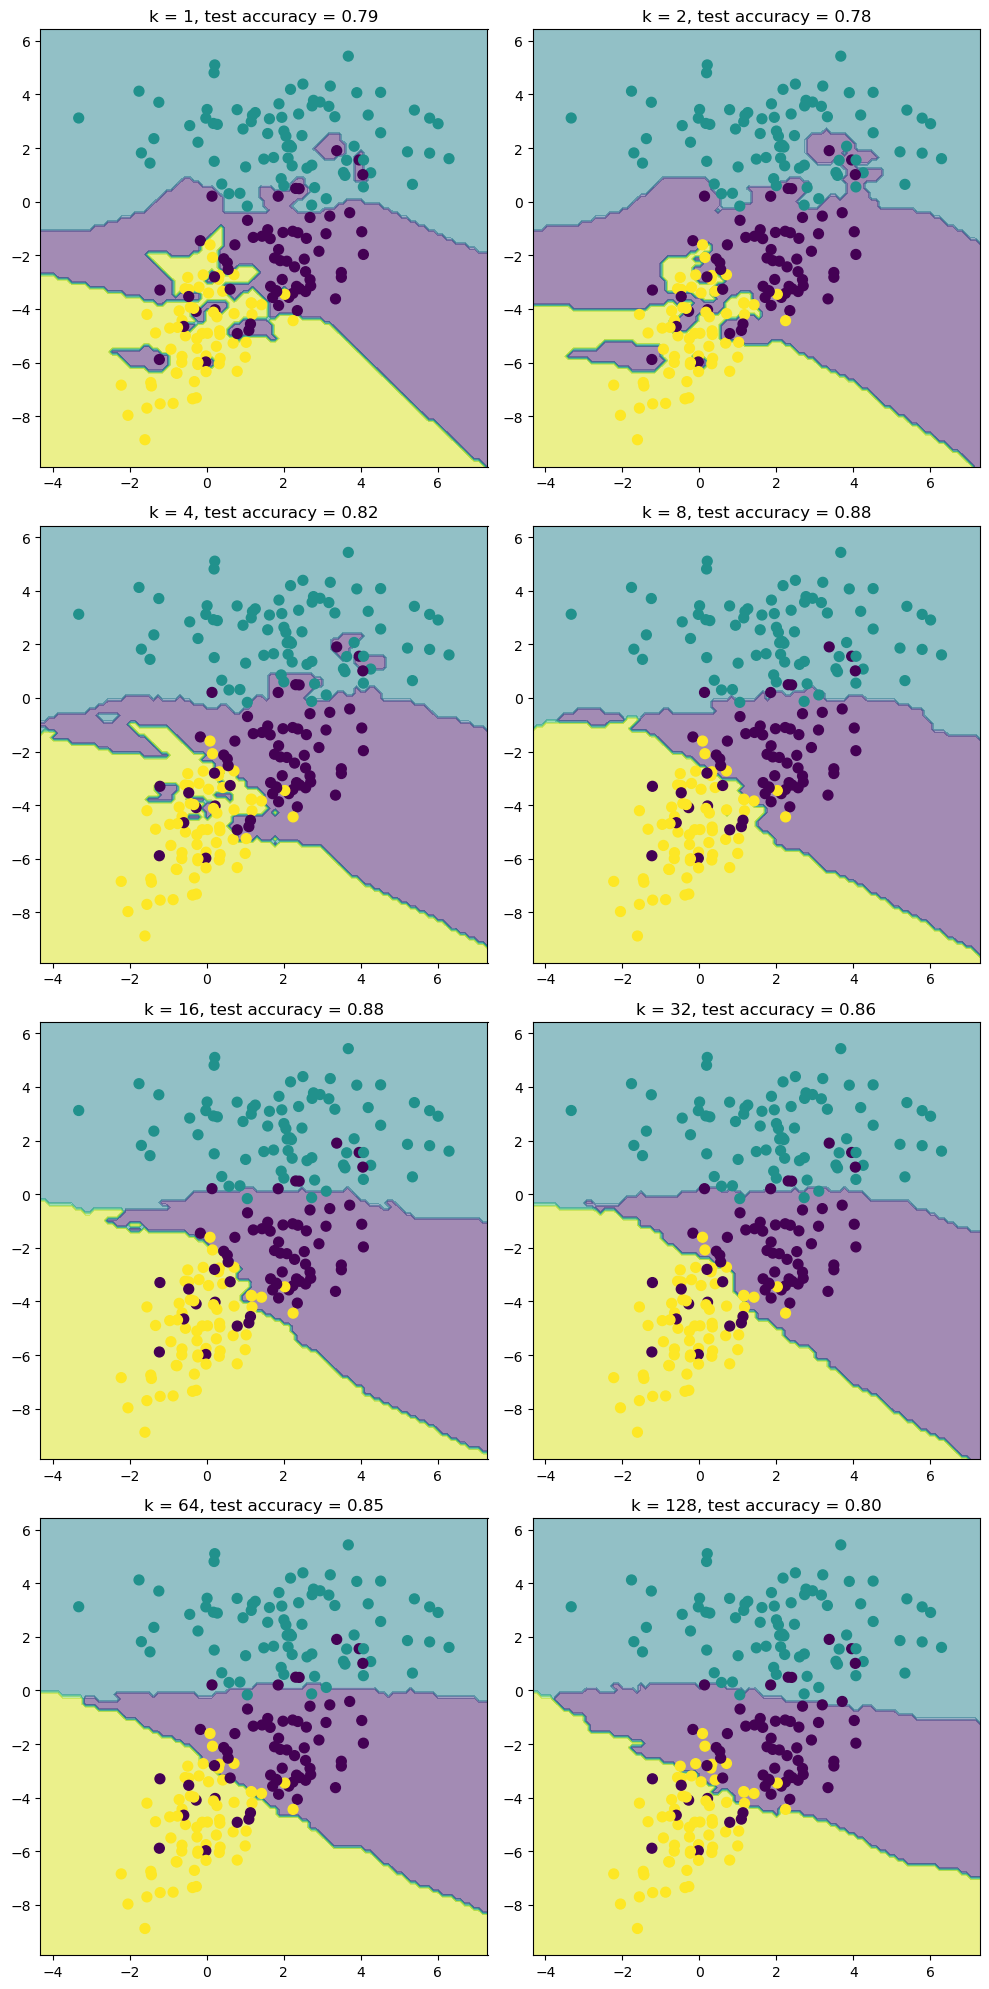

In [19]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for i, ax in enumerate(axes.ravel()):
    k = 2 ** i
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_valid, y_valid)

    DecisionBoundaryDisplay.from_estimator(knn, X_train, response_method="predict", alpha=0.5, ax=ax)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)
    ax.set_title(f"k = {k}, test accuracy = {acc:.2f}")
plt.tight_layout()